In [99]:
import requests
import datetime
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [21]:
# 台美利差
"""
Actually, you can download these data as a csv file at the following link: 
https://www.investing.com/rates-bonds/us-10y-vs-tw-10y-historical-data
And you can easily get these data, and follow the following step to collate data.
"""
def TW10_US10_Spread(collateType = "update"):
    """ collateType
    "new" means you download a period of data and want to save it as a new one called "台美利差資料庫.csv".
    "update" means you download a/a period of new data and want to append to "台美利差資料庫.csv"
    """
    if collateType == "new":
        # after you download it, the csv file name would be formally as following, my example download from 20190101 to 20191231
        df_TW10US10 = pd.read_csv("Taiwan 10 Year vs US 10 Year Spread Bond Yield Historical Data.csv", encoding = "utf-8")

        # Let data from old to new.
        df_TW10US10 = df_TW10US10.iloc[::-1]
        df_TW10US10.reset_index(drop = True, inplace = True)

        # save it as a new csv called 台美利差資料庫.csv
        df_TW10US10.to_csv('台美利差資料庫.csv', encoding="utf-8", index = 0)
    elif collateType == "update":
        df_TW10US10_original = pd.read_csv("台美利差資料庫.csv")
        
        # a day or a period data which you'd like to update.
        df_TW10US10_new = pd.read_csv("Taiwan 10 Year vs US 10 Year Spread Bond Yield Historical Data.csv", encoding = "utf-8")
        
        # Let data from old to new.
        df_TW10US10_new = df_TW10US10_new.iloc[::-1]
        
        # concat
        df_TW10US10 = pd.concat([df_TW10US10_original, df_TW10US10_new])
        df_TW10US10.reset_index(drop = True, inplace = True)
        
        # save it into 台美利差資料庫.csv
        df_TW10US10.to_csv('台美利差資料庫.csv', encoding="utf-8", index = 0)

In [41]:
# 美國10年期-2年期利差
"""
Actually, you can download these data as a csv file at the following link: 
US10Y : https://www.investing.com/rates-bonds/u.s.-10-year-bond-yield-historical-data
US2Y : https://www.investing.com/rates-bonds/u.s.-2-year-bond-yield-historical-data
And you can easily get these data, and follow the following step to collate data.
"""
def US10_US2_Spread(collateType = "update"):
    """ collateType
    "new" means you download a period of data and want to save it as a new one called "台美利差資料庫.csv".
    "update" means you download a/a period of new data and want to append to "台美利差資料庫.csv"
    """
    if collateType == "new":
        # after you download it, the csv file name would be formally as following, my example download from 20190101 to 20191231
        df_US2 = pd.read_csv("United States 2-Year Bond Yield Historical Data.csv", encoding = "utf-8")
        df_US2.rename(columns = {"Price":"US2_Price"}, inplace = True)
        df_US2 = df_US2[["Date", "US2_Price"]]
        df_US10 = pd.read_csv("United States 10-Year Bond Yield Historical Data.csv", encoding = "utf-8")
        df_US10.rename(columns = {"Price":"US10_Price"}, inplace = True)
        df_US10 = df_US10[["US10_Price"]]
        df_US10US2 = pd.concat([df_US2, df_US10], axis = 1)
        df_US10US2["10-2"] = df_US10US2["US10_Price"] - df_US10US2["US2_Price"]
        
        # Let data from old to new.
        df_US10US2 = df_US10US2.iloc[::-1]
        df_US10US2.reset_index(drop = True, inplace = True)

        # save it as a new csv called 台美利差資料庫.csv
        df_US10US2.to_csv('美國10-2利差資料庫.csv', encoding="utf-8", index = 0)
        
    elif collateType == "update":
        df_US10US2_original = pd.read_csv("美國10-2利差資料庫.csv")
        
        # a day or a period data which you'd like to update.
        df_US2_new = pd.read_csv("United States 2-Year Bond Yield Historical Data.csv", encoding = "utf-8")
        df_US2_new.rename(columns = {"Price":"US2_Price"}, inplace = True)
        df_US2_new = df_US2_new[["Date", "US2_Price"]]
        df_US10_new = pd.read_csv("United States 10-Year Bond Yield Historical Data.csv", encoding = "utf-8")
        df_US10_new.rename(columns = {"Price":"US10_Price"}, inplace = True)
        df_US10_new = df_US10_new[["US10_Price"]]
        df_US10US2_new = pd.concat([df_US2_new, df_US10_new], axis = 1)
        df_US10US2_new["10-2"] = df_US10US2_new["US10_Price"] - df_US10US2_new["US2_Price"]
        
        # Let data from old to new.
        df_US10US2_new = df_US10US2_new.iloc[::-1]
        
        # concat
        df_US10US2 = pd.concat([df_US10US2_original, df_US10US2_new])
        df_US10US2.reset_index(drop = True, inplace = True)
        
        # save it into 台美利差資料庫.csv
        df_US10US2.to_csv('美國10-2利差資料庫.csv', encoding="utf-8", index = 0)

In [89]:
# 美國非農就業人數
"""
Actually, you can get these data and do a csv file at the following link: 
https://www.investing.com/economic-calendar/nonfarm-payrolls-227
And you can follow the following step to collate data.
"""
df_nonfarmPayrolls = pd.read_csv("US Nonfarm Payrolls.csv", encoding = "utf-8")
df_nonfarmPayrolls = df_nonfarmPayrolls.iloc[::-1]
df_nonfarmPayrolls.reset_index(drop = True, inplace = True)
df_nonfarmPayrolls = df_nonfarmPayrolls[["Release Date", "Actual", "Forecast"]]
df_nonfarmPayrolls["Actual"] = [int(i.replace("K","")) * 1000 for i in df_nonfarmPayrolls["Actual"]]
df_nonfarmPayrolls["Forecast"] = [int(i.replace("K","")) * 1000 for i in df_nonfarmPayrolls["Forecast"]]
df_nonfarmPayrolls.to_csv('非農資料庫.csv', encoding="utf-8", index = 0)

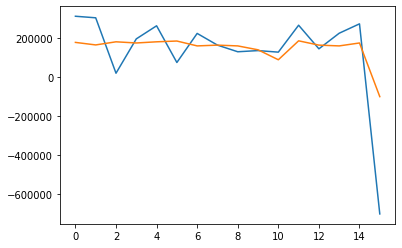

In [90]:
plt.plot(df_nonfarmPayrolls["Actual"])
plt.plot(df_nonfarmPayrolls["Forecast"])

In [100]:
# VIX
def crawl_price_vix(security_id="^VIX"):
    start = int(datetime.datetime.now().timestamp()) - 86400 * 365
    now = int(datetime.datetime.now().timestamp()) + 86400
    url = "https://query1.finance.yahoo.com/v8/finance/chart/" + security_id + "?period1=" + str(start) + "&period2=" + str(now) + "&interval=1d&events=history&=hP2rOschxO0"
    response = requests.get(url)
    data = json.loads(response.text)
    df = pd.DataFrame(data['chart']['result'][0]['indicators']['quote'][0], index=pd.to_datetime(np.array(data['chart']['result'][0]['timestamp'])*1000*1000*1000))
    return df.to_csv('VIX資料庫.csv', encoding="utf-8", index = 0)

In [101]:
crawl_price_vix()

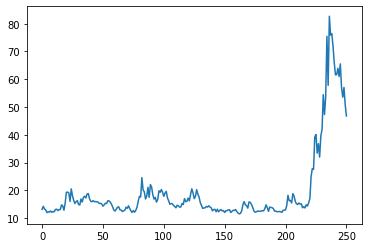

In [103]:
df = pd.read_csv("VIX資料庫.csv")
plt.plot(df.close)